In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/train/combined_data.csv")
df.sample(5)

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ,label
12498,0.011,-0.150,-0.263,-70.374,-52.856,0.000,-162.279,-23.912,-120.663,climbing
30163,-0.451,0.337,-0.922,55.725,29.175,-29.541,-178.171,3.554,22.582,climbing
178259,0.091,-0.117,-0.919,-27.161,-19.287,-27.710,166.860,-14.370,-73.724,walking
175441,-0.512,0.140,-1.120,65.125,-9.949,-29.541,167.388,19.133,-87.869,walking
179844,-0.021,0.034,-1.058,-19.653,24.231,-50.964,168.860,12.590,-177.797,walking


In [3]:
df.shape

(186444, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186444 entries, 0 to 186443
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ax      186444 non-null  float64
 1   ay      186444 non-null  float64
 2   az      186444 non-null  float64
 3   wx      186444 non-null  float64
 4   wy      186444 non-null  float64
 5   wz      186444 non-null  float64
 6   AngleX  186444 non-null  float64
 7   AngleY  186444 non-null  float64
 8   AngleZ  186444 non-null  float64
 9   label   186444 non-null  object 
dtypes: float64(9), object(1)
memory usage: 14.2+ MB


In [5]:
df.describe()

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ
count,186444.000000,186444.000000,186444.000000,186444.000000,186444.000000,186444.000000,186444.000000,186444.000000,186444.000000
mean,-0.210908,0.094061,-0.885405,-0.787627,-0.683248,0.070303,97.142968,14.742140,-12.451345
std,0.545735,0.284258,0.603507,50.136492,65.569502,64.330213,138.536357,25.004095,86.811809
min,-13.703000,-11.896000,-15.465000,-614.380000,-686.646000,-490.479000,-179.995000,-69.911000,-179.995000
25%,-0.618000,-0.019000,-0.988000,-11.902000,-12.024000,-14.038000,162.070000,-4.191000,-83.491000
50%,-0.123000,0.129000,-0.896000,-0.366000,0.061000,0.305000,167.822000,14.777000,-16.817500
75%,0.133000,0.241000,-0.629000,6.226000,6.348000,10.437000,170.728000,33.530000,46.214000
max,9.617000,6.222000,15.990000,513.916000,873.108000,788.513000,179.995000,89.418000,179.995000


In [6]:
df.isnull().sum()

ax        0
ay        0
az        0
wx        0
wy        0
wz        0
AngleX    0
AngleY    0
AngleZ    0
label     0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df["label"].value_counts()

label
lying       45899
sitting     38983
running     36030
walking     33069
climbing    32463
Name: count, dtype: int64

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.sample(5)

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ,label
69413,0.135,0.283,-0.956,-0.244,0.244,0.427,163.076,-8.229,-110.094,lying
83942,-0.532,0.858,-1.033,29.297,-103.577,115.540,175.259,15.040,9.959,running
167440,-0.579,0.106,-1.182,-25.696,74.402,-2.686,167.899,19.698,-28.746,walking
86398,0.602,0.029,-1.403,-32.715,-97.412,32.043,169.761,17.018,-20.550,running
182417,0.122,0.303,-0.908,29.907,15.015,8.789,-179.044,-3.219,111.786,walking


In [11]:
X = df.iloc[:, :-1]
y = df['label']

In [12]:
X.columns

Index(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'AngleX', 'AngleY', 'AngleZ'], dtype='object')

In [13]:
X.shape

(186444, 9)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ
0,-0.557216,-0.246471,0.027184,0.425971,-0.061260,0.436292,0.566091,0.548626,1.250206
1,-0.537060,-0.246471,0.027184,0.425971,-0.061260,0.436292,0.566445,0.549746,1.246474
2,-0.537060,-0.246471,0.017242,0.472225,-0.072423,0.404037,0.566922,0.551266,1.242868
3,-0.516903,-0.246471,0.017242,0.472225,-0.072423,0.404037,0.567557,0.552785,1.239447
4,-0.516903,-0.162041,0.010614,0.500228,-0.061260,0.355646,0.568315,0.554345,1.236152


In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dropout, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [16]:
df.columns

Index(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'AngleX', 'AngleY', 'AngleZ',
       'label'],
      dtype='object')

In [17]:
# Extracting features and labels
X = X_scaled_df[['ax', 'ay', 'az', 'wx', 'wy',
                 'wz', 'AngleX', 'AngleY', 'AngleZ']].values
y = df['label'].values

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Sliding window parameters
window_size = 128  # Adjust as needed
stride = 64  # Adjust as needed

# Generate sequences using sliding windows
sequences = []
labels = []

for i in range(0, len(X) - window_size + 1, stride):
    window = X[i:i+window_size]
    label = y_categorical[i+window_size-1]
    sequences.append(window)
    labels.append(label)

X_sliding = np.array(sequences)
y_sliding = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    X_sliding, y_sliding, test_size=0.2, random_state=42)

In [20]:
# Build the CNN model
model = Sequential()

model.add(Conv1D(32, kernel_size=3, activation='relu',
          input_shape=(window_size, X_scaled.shape[1])))
model.add(MaxPooling1D(pool_size=2, padding="valid"))

model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding="valid"))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding="valid"))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Train the model
history = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_test, y_test))

Epoch 1/40
73/73 [==============================] - 1s 12ms/step - loss: 0.0933 - accuracy: 0.9712 - val_loss: 0.2394 - val_accuracy: 0.9245
Epoch 2/40
73/73 [==============================] - 1s 11ms/step - loss: 0.0133 - accuracy: 0.9979 - val_loss: 0.4439 - val_accuracy: 0.9365
Epoch 3/40
73/73 [==============================] - 1s 8ms/step - loss: 0.0130 - accuracy: 0.9966 - val_loss: 0.2681 - val_accuracy: 0.9468
Epoch 4/40
73/73 [==============================] - 1s 9ms/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.3998 - val_accuracy: 0.9417
Epoch 5/40
73/73 [==============================] - 1s 8ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.2950 - val_accuracy: 0.9503
Epoch 6/40
73/73 [==============================] - 1s 8ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.3272 - val_accuracy: 0.9451
Epoch 7/40
73/73 [==============================] - 1s 8ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.3117 - val_accuracy: 0.9503
Epoch 8/40
73/73 [

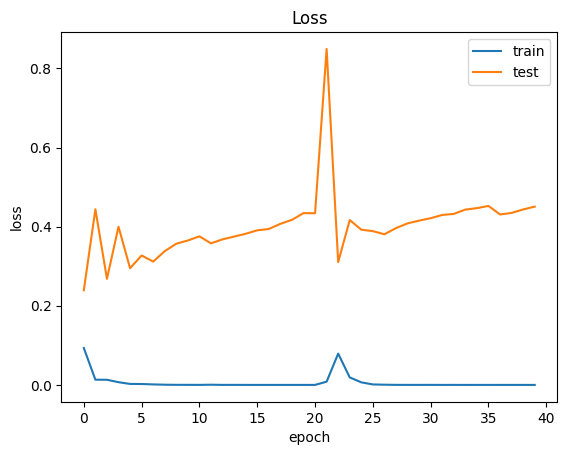

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')

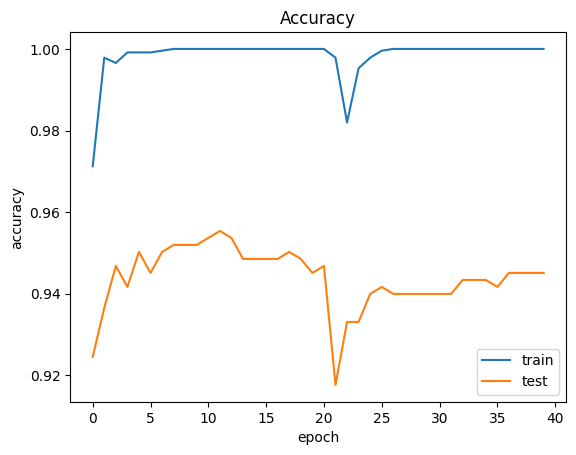

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='lower right')

Making Predictions


In [30]:
# Read data from walking.csv, creating df, apply sliding windows on data and make prediction
df = pd.read_csv("../data/test/walking.csv")
df

,ax,ay,az,wx,wy,wz,AngleX,AngleY,AngleZ
0,0.2329,-0.8633,-0.0405,327.9419,89.4775,-147.8882,-67.7087,7.8992,143.8495
1,0.2329,-0.8633,-0.0405,289.2456,109.1919,-123.8403,-65.1874,7.2015,142.3444
2,0.2266,-0.7773,-0.0244,289.2456,109.1919,-123.8403,-62.6660,6.5698,140.8173
3,0.2266,-0.7773,-0.0244,258.6670,95.0928,-86.7920,-60.4138,6.2457,139.5648
4,0.1680,-0.7354,0.0093,258.6670,95.0928,-86.7920,-58.1726,5.9711,138.3069
...,...,...,...,...,...,...,...,...,...
29098,0.8931,0.3052,-0.4683,33.0200,6.6528,3.9673,142.7344,-59.4690,-36.7877
29099,0.9517,0.3804,-0.4844,33.0200,6.6528,3.9673,143.0200,-59.5514,-36.7657
29100,0.9517,0.3804,-0.4844,30.5786,1.3428,-1.3428,143.2672,-59.5569,-36.7218
29101,0.8926,0.3428,-0.4302,30.5786,1.3428,-1.3428,143.5144,-59.5569,-36.6779


In [31]:
# applying snadradscaler
X_scaled = scaler.transform(df)
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

In [32]:
# Create a sliding window of 10 seconds for the data
window_size = 128
stride = 64

# Generate sequences using sliding windows
sequences = []
labels = []
for i in range(len(X_scaled_df) - window_size):
    window = X_scaled_df[i:i+window_size]
    sequences.append(window)

X_sliding = np.array(sequences)

# Make predictions
y_pred = model.predict(X_sliding)
y_pred = np.argmax(y_pred, axis=1)
y_pred = label_encoder.inverse_transform(y_pred)
print("Predicted labels are : ", y_pred)

906/906 [==============================] - 3s 3ms/step
Predicted labels are :  ['climbing' 'climbing' 'climbing' ... 'sitting' 'sitting' 'sitting']


In [28]:
import pickle

pickle.dump(model, open('../dumpFiles/CNN_model.pkl', 'wb'))
pickle.dump(scaler, open('../dumpFiles/scaler.pkl', 'wb'))
pickle.dump(label_encoder, open('../dumpFiles/label_encoder.pkl', 'wb'))